Here's a summary of the basic steps and methods used in the code:

**1. Data Loading and Preprocessing:**

The code begins by loading the beer review dataset from a CSV file using pandas.
Unnecessary columns such as 'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender', 'user/profileName', and 'review/timeStruct' are dropped to clean the data.
**2. Data Exploration:**

The code displays information about the dataset, including data types, column names, and the number of non-null entries.
Summary statistics like count, mean, std, min, and max are provided for numerical columns.
**Method 1: Using Numerical Features:**

A subset of the dataset containing only numerical features ('beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste') is selected.
The target variable 'review/overall' is separated from the input features.
The data is split into training and testing sets using train_test_split.
A linear regression model is created and trained on the training data.
The model is evaluated on the test data using mean squared error (MSE), and the result is printed.

**Method 2: Using Categorical and Numerical Features:**

Another subset of the dataset is selected, including both numerical and categorical features ('beer/ABV', 'beer/name', 'beer/style', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste').
Categorical features ('beer/name' and 'beer/style') are encoded using label encoding.
Similar to Method 1, the data is split, a linear regression model is trained, and MSE is computed and printed.


**Method 3: Using Text Features (TF-IDF):**

This method focuses on the 'review/text' feature.
The 'review/text' column is separated as the input feature, and 'review/overall' is the target variable.
Text data is processed using TF-IDF vectorization (with a maximum of 1000 features).
The data is split, a linear regression model is trained, and MSE is computed and printed.

**Method 4: Combining Numerical and Text Features:**

This method combines the numerical features from Method 1 and the TF-IDF text features from Method 3.
The two sets of features are concatenated, and column names are converted to strings to ensure compatibility.
Data is split, a linear regression model is trained, and MSE is computed and printed.

**Method 5: Combining Categorical, Numerical, and Text Features:**

*Similar to Method 4, this method combines categorical, numerical, and text features.
*It first combines the features from Method 2 and the TF-IDF text features from Method 3.
*Data is split, a linear regression model is trained, and MSE is computed and printed.

**Text Data Preprocessing:**

Converts text to lowercase.
Removes punctuation, stopwords, and lemmatizes words.
Tokenizes text data.


**Method 6: Text Preprocessing and TF-IDF Vectorization:**

Applies text preprocessing to the 'review/text' column.
Converts cleaned text into TF-IDF vectors.
Evaluates various regression models on TF-IDF vectorized text.


**Method 7: Combining Numerical Features with Preprocessed Text:**

Combines numerical features with TF-IDF vectorized text.
Evaluates regression models on the combined dataset.


**Method 8: Combining Categorical and Numerical Features with Preprocessed Text:**

Combines categorical and numerical features with TF-IDF vectorized text.
Evaluates regression models on the combined dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data= pd.read_csv("/content/train.csv")

In [5]:
data.drop(["user/ageInSeconds", "user/birthdayRaw","user/birthdayUnix", "user/gender", "user/profileName","review/timeStruct"], axis=1, inplace=True)

In [6]:
data.head(5)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,1229398690
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,1218238738
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,1101492422
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,1308532025
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,1299912708


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeUnix    37500 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 3.7+ MB


In [7]:
data.dropna(subset=['review/text'], inplace=True)

In [ ]:
data.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix
count,37490.000000,37490.000000,37490.000000,37490.000000,37490.000000,37490.000000,37490.000000,37490.000000,37490.000000,3.749000e+04
mean,24951.998453,7.403336,21861.062497,3036.404268,3.899947,3.873126,3.889264,3.854695,3.922273,1.232786e+09
std,14434.402610,2.318013,18924.136376,5122.945144,0.588705,0.680791,0.700417,0.667994,0.716485,7.191497e+07
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,9.262944e+08
25%,12421.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.189180e+09
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.248150e+09
75%,37418.250000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.500000,4.500000,4.500000,1.291328e+09
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326267e+09


In [ ]:
data.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeUnix'],
      dtype='object')

<ipython-input-9-ba74ed272e50>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


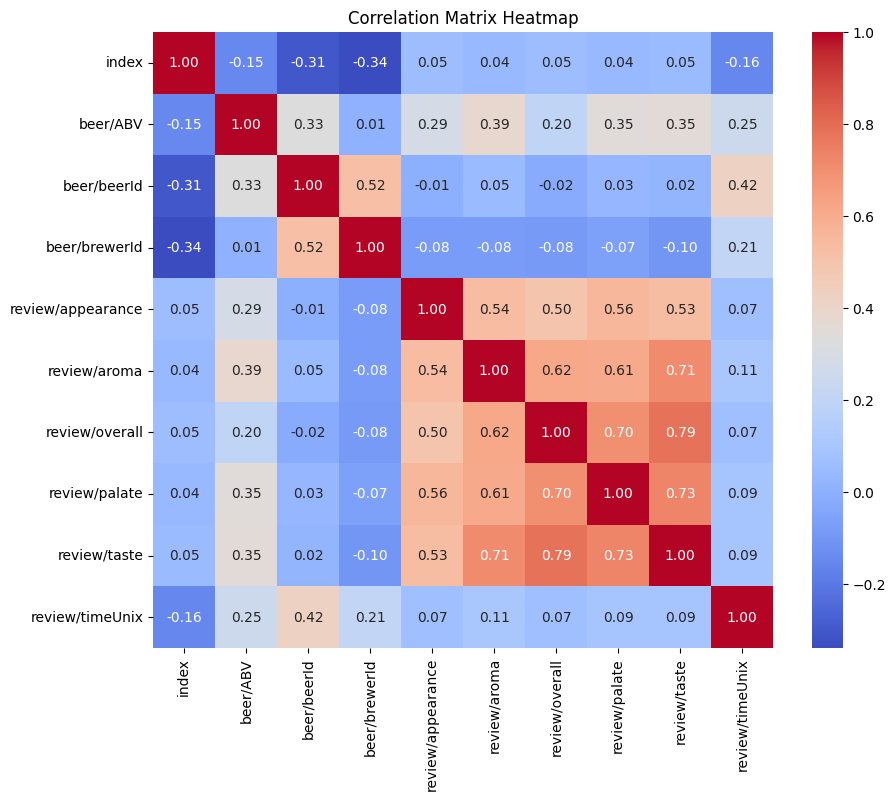

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
def evaluate_regression_models(X_train, X_test, y_train, y_test):
    # Initialize a dictionary to store model names and their corresponding models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        # 'Random Forest Regressor': RandomForestRegressor(),
        # 'Gradient Boosting Regressor': GradientBoostingRegressor(),
        # 'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
        # 'Support Vector Regressor': SVR()
    }

    # Initialize a dictionary to store model MSE results
    model_results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)
        # Calculate R-squared (R²)
        r2 = r2_score(y_test, y_pred)
        # Store results in a dictionary
        model_results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R²': r2}

        print(f"{model_name} - MSE: {mse},    RMSE: {rmse},    R²: {r2}")

    return model_results

Method 1

In [14]:
X1 = data[['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste']]
y1 = data['review/overall']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [15]:
method1_mse_results = evaluate_regression_models(X1_train, X1_test, y1_train, y1_test)

Linear Regression - MSE: 0.1613026269974113,    RMSE: 0.4016249830344364,    R²: 0.6801080491962365
Ridge Regression - MSE: 0.16130297346651606,    RMSE: 0.4016254143683092,    R²: 0.6801073620860518
Lasso Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
ElasticNet Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
Decision Tree Regressor - MSE: 0.23163818949895573,    RMSE: 0.4812880525204794,    R²: 0.5406200525137015
Random Forest Regressor - MSE: 0.1839248125959691,    RMSE: 0.42886456206589174,    R²: 0.635244210229227
Gradient Boosting Regressor - MSE: 0.15715574490940978,    RMSE: 0.3964287387531456,    R²: 0.6883320578536112
K-Nearest Neighbors Regressor - MSE: 0.1892971459055748,    RMSE: 0.43508291842541325,    R²: 0.624589912684492
Support Vector Regressor - MSE: 0.1581783839485126,    RMSE: 0.39771646175197806,    R²: 0.6863039817876712


Method 2

In [16]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
selected_features = data[['beer/ABV', 'beer/name', 'beer/style', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']]
# Handle categorical features: Encode 'beer/name' and 'beer/style'
label_encoder = LabelEncoder()
selected_features['beer/name'] = label_encoder.fit_transform(selected_features['beer/name'].astype(str))  # Convert to string first
selected_features['beer/style'] = label_encoder.fit_transform(selected_features['beer/style'].astype(str))  # Convert to string first

In [18]:
# Split the data into input features (X) and the target variable (y)
X2 = selected_features.drop(columns=['review/overall'])
y2 = selected_features['review/overall']

In [19]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [20]:
method2_mse_results = evaluate_regression_models(X2_train, X2_test, y2_train, y2_test)

Linear Regression - MSE: 0.16038062138040374,    RMSE: 0.4004754941071972,    R²: 0.6819365511925575
Ridge Regression - MSE: 0.16038095677044906,    RMSE: 0.4004759128467642,    R²: 0.6819358860541287
Lasso Regression - MSE: 0.4989176053861192,    RMSE: 0.7063409979507909,    R²: 0.010557180324971882
ElasticNet Regression - MSE: 0.49798252536502224,    RMSE: 0.7056787692463351,    R²: 0.01241161120235068
Decision Tree Regressor - MSE: 0.2590463635279471,    RMSE: 0.508965974823413,    R²: 0.4862647427378488
Random Forest Regressor - MSE: 0.18420717507612813,    RMSE: 0.42919363354566215,    R²: 0.634684234943683
Gradient Boosting Regressor - MSE: 0.15498231829783524,    RMSE: 0.3936779372759353,    R²: 0.6926423514405627
K-Nearest Neighbors Regressor - MSE: 0.2255748199519872,    RMSE: 0.4749471759595873,    R²: 0.5526447984767975
Support Vector Regressor - MSE: 0.4536387183254697,    RMSE: 0.673527073194144,    R²: 0.10035330938793441


Method 3

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
selected_features_3 = data[['review/text', 'review/overall']]

# Split the data into input features (X) and the target variable (y)
X3 = selected_features_3['review/text']
y3 = selected_features_3['review/overall']

# Text processing: Convert text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_text_tfidf = tfidf_vectorizer.fit_transform(X3)

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text_tfidf, y3, test_size=0.2, random_state=42)

In [24]:
method3_mse_results = evaluate_regression_models(X_train_text, X_test_text, y_train, y_test)

Linear Regression - MSE: 0.3127237056861213,    RMSE: 0.559217047027468,    R²: 0.37981297554366045
Ridge Regression - MSE: 0.3117623840437382,    RMSE: 0.5583568608369903,    R²: 0.3817194482481424
Lasso Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
ElasticNet Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
Decision Tree Regressor - MSE: 0.7047129234462524,    RMSE: 0.839471812180881,    R²: -0.3975717323032988


Method 4

In [25]:
X1_combined_train = pd.concat([X1,pd.DataFrame(X_text_tfidf.toarray(), index=X1.index)], axis=1)

In [26]:
X1_combined_train.columns = X1_combined_train.columns.astype(str)

In [27]:
X1_combined_train.head()

,beer/ABV,review/appearance,review/aroma,review/palate,review/taste,0,1,2,3,4,...,990,991,992,993,994,995,996,997,998,999
0,5.0,4.0,4.0,4.0,4.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,4.0,3.5,3.5,3.0,0.0,0.000000,0.0,0.0,0.116465,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,3.5,4.0,3.5,3.5,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.18468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.4,3.0,3.0,3.0,3.0,0.0,0.161012,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.4,4.0,3.0,3.5,2.5,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X4_train_text, X4_test_text, y4_train, y4_test = train_test_split(X1_combined_train, y1, test_size=0.2, random_state=42)

In [29]:
method4_mse_results = evaluate_regression_models(X4_train_text, X4_test_text, y4_train, y4_test)

Linear Regression - MSE: 0.15278248493222485,    RMSE: 0.39087400135110656,    R²: 0.6970050143423865
Ridge Regression - MSE: 0.15212835377096806,    RMSE: 0.39003634929448316,    R²: 0.698302273396074
Lasso Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
ElasticNet Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
Decision Tree Regressor - MSE: 0.31138303547612695,    RMSE: 0.5580170566175616,    R²: 0.38247176428655205


Method 5

In [30]:
X2_combined_train = pd.concat([X2,pd.DataFrame(X_text_tfidf.toarray(), index=X2.index)], axis=1)
X2_combined_train.columns = X2_combined_train.columns.astype(str)

In [31]:
X5_train_text, X5_test_text, y5_train, y5_test = train_test_split(X2_combined_train, y2, test_size=0.2, random_state=42)

In [32]:
method5_mse_results = evaluate_regression_models(X5_train_text, X5_test_text, y5_train, y5_test)

Linear Regression - MSE: 0.1527423381370393,    RMSE: 0.39082264281517687,    R²: 0.6970846326156253
Ridge Regression - MSE: 0.1520859728262154,    RMSE: 0.3899820160292207,    R²: 0.6983863223873781
Lasso Regression - MSE: 0.4989176053861192,    RMSE: 0.7063409979507909,    R²: 0.010557180324971882
ElasticNet Regression - MSE: 0.49798252536502224,    RMSE: 0.7056787692463351,    R²: 0.01241161120235068
Decision Tree Regressor - MSE: 0.31698452920778875,    RMSE: 0.5630137913122455,    R²: 0.37136300065020356


Cleaning Text data

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [34]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization (split text into words)
    words = nltk.word_tokenize(text)

    # Remove stopwords (common words like 'the', 'and', 'in', etc.)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization (reduce words to their base form)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)

    return cleaned_text


In [35]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Method 6

In [36]:
# Apply text preprocessing to the 'review/text' column
data['cleaned_text'] = data['review/text'].apply(preprocess_text)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

selected_features_clean = data[['cleaned_text', 'review/overall']]

# Split the data into input features (X) and the target variable (y)
X6 = selected_features_clean['cleaned_text']
y6 = selected_features_clean['review/overall']

# Text processing: Convert text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X6_text_tfidf = tfidf_vectorizer.fit_transform(X6)

X6_train_text, X6_test_text, y6_train, y6_test = train_test_split(X6_text_tfidf, y6, test_size=0.2, random_state=42)


In [38]:
method6_mse_results = evaluate_regression_models(X6_train_text, X6_test_text, y6_train, y6_test)

Linear Regression - MSE: 0.3177939434409973,    RMSE: 0.5637321557628209,    R²: 0.369757787499685
Ridge Regression - MSE: 0.31674928525246127,    RMSE: 0.5628048376235418,    R²: 0.37182953147605124
Lasso Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
ElasticNet Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
Decision Tree Regressor - MSE: 0.6745132035209389,    RMSE: 0.8212875279224316,    R²: -0.3376802878769729


Method 7

In [39]:
X1_combined_train_clean = pd.concat([X1,pd.DataFrame(X6_text_tfidf.toarray(), index=X1.index)], axis=1)

X1_combined_train_clean.columns = X1_combined_train_clean.columns.astype(str)

X7_train_text, X7_test_text, y7_train, y7_test = train_test_split(X1_combined_train_clean, y1, test_size=0.2, random_state=42)


In [40]:
method7_mse_results = evaluate_regression_models(X7_train_text, X7_test_text, y7_train, y7_test)

Linear Regression - MSE: 0.15233848090818944,    RMSE: 0.3903056250019841,    R²: 0.6978855537115047
Ridge Regression - MSE: 0.15178898055486253,    RMSE: 0.38960105307206566,    R²: 0.6989753111647167
Lasso Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
ElasticNet Regression - MSE: 0.5043591156628163,    RMSE: 0.7101824523760188,    R²: -0.0002343075145865292
Decision Tree Regressor - MSE: 0.30121365697519337,    RMSE: 0.5488293514155319,    R²: 0.4026394601739707


Method 8

In [41]:
X2_combined_train_clean = pd.concat([X2,pd.DataFrame(X6_text_tfidf.toarray(), index=X2.index)], axis=1)

X2_combined_train_clean.columns = X2_combined_train_clean.columns.astype(str)

X8_train_text, X8_test_text, y8_train, y8_test = train_test_split(X2_combined_train_clean, y2, test_size=0.2, random_state=42)

In [42]:
method8_mse_results = evaluate_regression_models(X8_train_text, X8_test_text, y8_train, y8_test)

Linear Regression - MSE: 0.15230775413220074,    RMSE: 0.39026626056091596,    R²: 0.6979464904023442
Ridge Regression - MSE: 0.15175652486702443,    RMSE: 0.3895593983810741,    R²: 0.6990396765968889
Lasso Regression - MSE: 0.4989176053861192,    RMSE: 0.7063409979507909,    R²: 0.010557180324971882
ElasticNet Regression - MSE: 0.49798252536502224,    RMSE: 0.7056787692463351,    R²: 0.01241161120235068
Decision Tree Regressor - MSE: 0.3004467858095492,    RMSE: 0.548130263541021,    R²: 0.4041603028146612
